In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# Parameters
D = 500  # Dose in mg
V = 50  # Volume of distribution in L
t_half = 8  # Half-life in hours
tau = 12  # Dosing interval in hours

# Calculated parameters
k = np.log(2) / t_half  # Elimination rate constant
CL = V * k  # Clearance

# Time array
t_max = 48  # Total time for simulation in hours
time = np.linspace(0, t_max, 1000)

# Function to calculate concentration at any time t
def concentration(t, D, V, k, tau):
    conc = np.zeros_like(t)#ndarray of zeros
    for i, time_point in enumerate(t):
        for n in range(int(time_point // tau) + 1):#// is floor division
            conc[i] += (D / V) * np.exp(-k * (time_point - n * tau))
    return conc

# Calculate concentration over time
conc = concentration(time, D, V, k, tau)

#ode system parameters
rho = 10
k = 10
delta = 12
S = 20
R = 20
r = [S, R]
EC_50 = 30

#system ode
def system_ode(t, r):
    S = r[0]
    R = r[1]
    conc_t = np.interp(t, time, conc)
    dSdt = (1-(conc_t/(conc_t + EC_50))*rho*(1-(S + R)/k)) - delta*S
    dRdt = rho*R*(1- (S + R)/k) - delta*R
    return dSdt, dRdt
ode_soln = solve_ivp(system_ode, t_span = [0, 48], y0 = [2, 2], t_eval = time)



                     

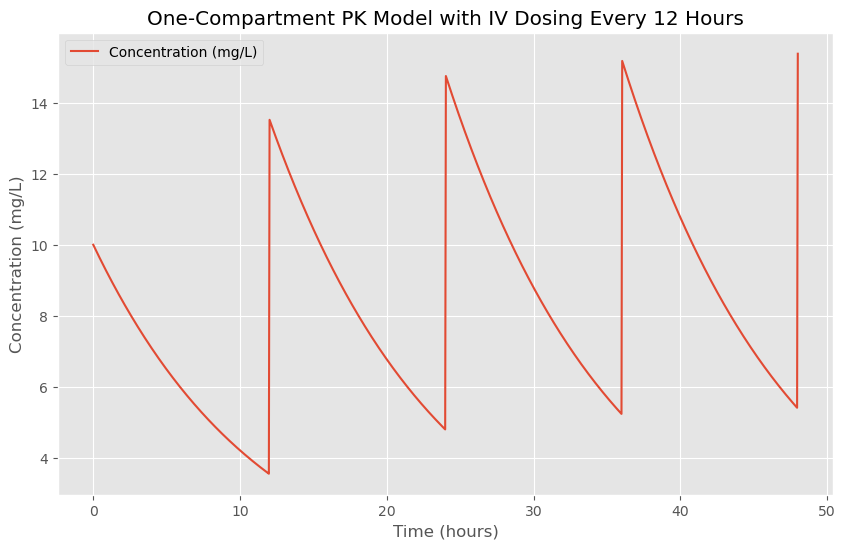

In [47]:
                     
# Plot the concentration vs time
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(time, conc, label='Concentration (mg/L)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('One-Compartment PK Model with IV Dosing Every 12 Hours')
plt.legend()
plt.grid(True)


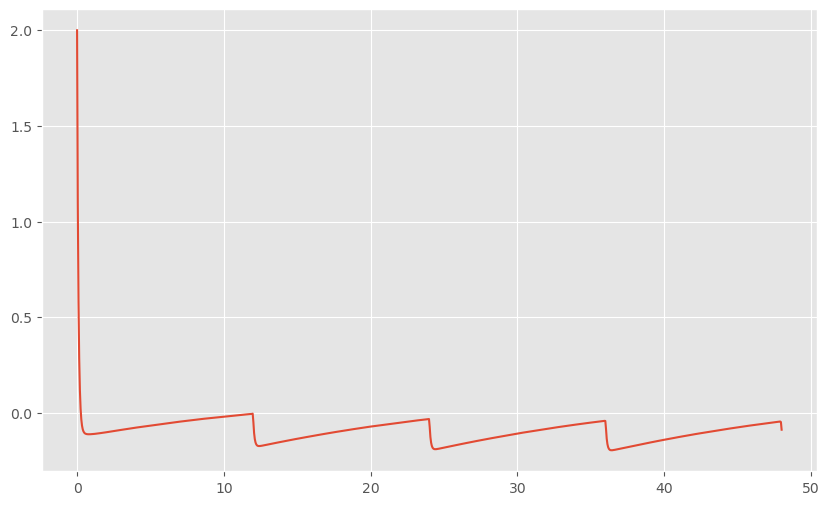

In [49]:
Sen = ode_soln.y[0]

plt.figure(figsize=(10, 6))
plt.plot(time, Sen)



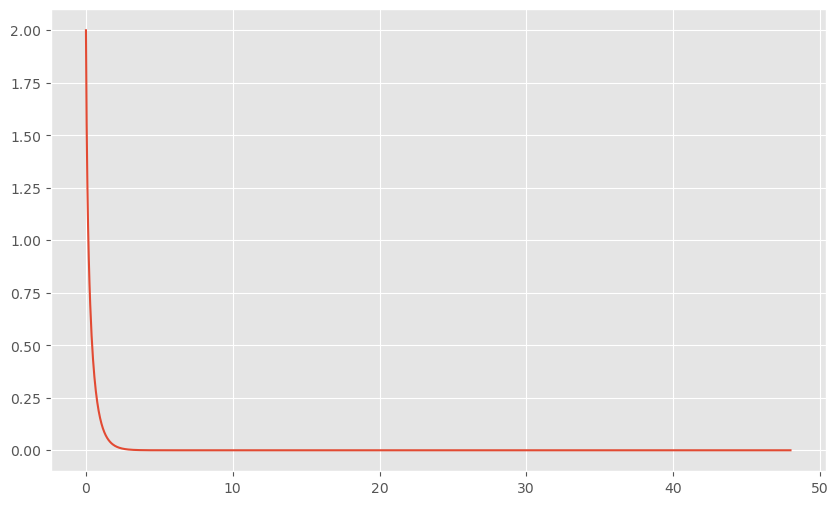

In [51]:
Ren = ode_soln.y[1]

plt.figure(figsize=(10, 6))
plt.plot(time, Ren)
